In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, hamming_loss, classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
import json
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

In [40]:
df = pd.read_parquet('sampled_data.parquet')
text_Data_df = df.copy()

In [41]:
df.head()

,id,title,topic,topics_with_percentages,text
0,40041732,"Orchard Park High School, Croydon",Mixed,"b'{""Education"":0.75,""Society"":0.25,""Academic_d...",Orchard Park High School (formerly Edenham H...
1,19016500,"Kąty, Gorlice County",Mixed,"b'{""Geography"":0.5,""Society"":0.5,""Academic_dis...",Kąty is a village in the administrative dist...
2,533477,List of airports in Turkey,Mixed,"b'{""Human_behavior"":0.25,""Economy"":0.25,""Geogr...","This is a list of airport s in Turkey , sort..."
3,8584578,Pete Bostwick,Mixed,"b'{""People"":0.6,""Sports"":0.26,""Business"":0.08,...",George Herbert &quot;Pete&quot; Bostwick (Au...
4,5054048,Sione's Wedding (soundtrack),Mixed,"b'{""Entertainment"":0.5,""History"":0.17,""Time"":0...",'Sione's Wedding' is the soundtrack to the N...


In [45]:
print(df[df["title"] == "Pete Bostwick"]["text"].to_markdown())

|    | text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

# Topics in the dataset

In [6]:
print(f"Number of levels for the topic attribute: {len(df['topic'].unique())}")

Number of levels for the topic attribute: 40


In [14]:
for key, value in df['topic'].value_counts().items():
    print(f"There are {value} instances of topic {key} in the dataset.")


There are 170000 instances of topic Mixed in the dataset.
There are 825 instances of topic Knowledge in the dataset.
There are 825 instances of topic Business in the dataset.
There are 825 instances of topic Politics in the dataset.
There are 825 instances of topic Military in the dataset.
There are 825 instances of topic Mass_media in the dataset.
There are 825 instances of topic History in the dataset.
There are 825 instances of topic Language in the dataset.
There are 825 instances of topic Engineering in the dataset.
There are 825 instances of topic Internet in the dataset.
There are 825 instances of topic Nature in the dataset.
There are 825 instances of topic Economy in the dataset.
There are 825 instances of topic Entertainment in the dataset.
There are 825 instances of topic Geography in the dataset.
There are 825 instances of topic Information in the dataset.
There are 825 instances of topic Time in the dataset.
There are 825 instances of topic Life in the dataset.
There are 8

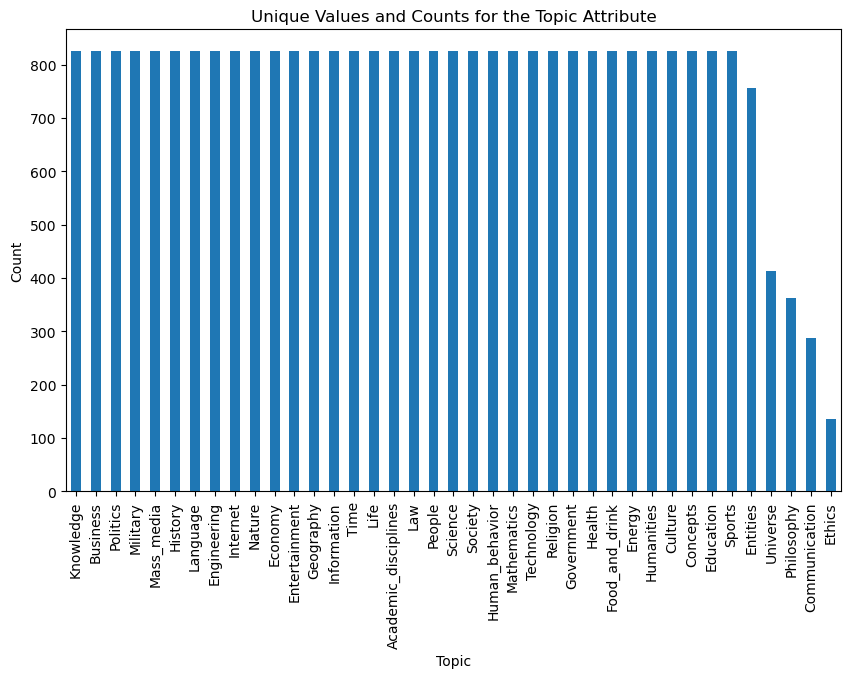

In [20]:
import matplotlib.pyplot as plt

# Count the unique values of the "topic" attribute
topic_counts = df['topic'].value_counts()
topic_counts = topic_counts.drop("Mixed")

# Create a bar chart
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Unique Values and Counts for the Topic Attribute')
plt.show()

# Label Distribution
Looking at the distribution of labels, there is evident label inbalance.
- Some labels have below 10000 instances.
- People Label has more than 70000 Instances.

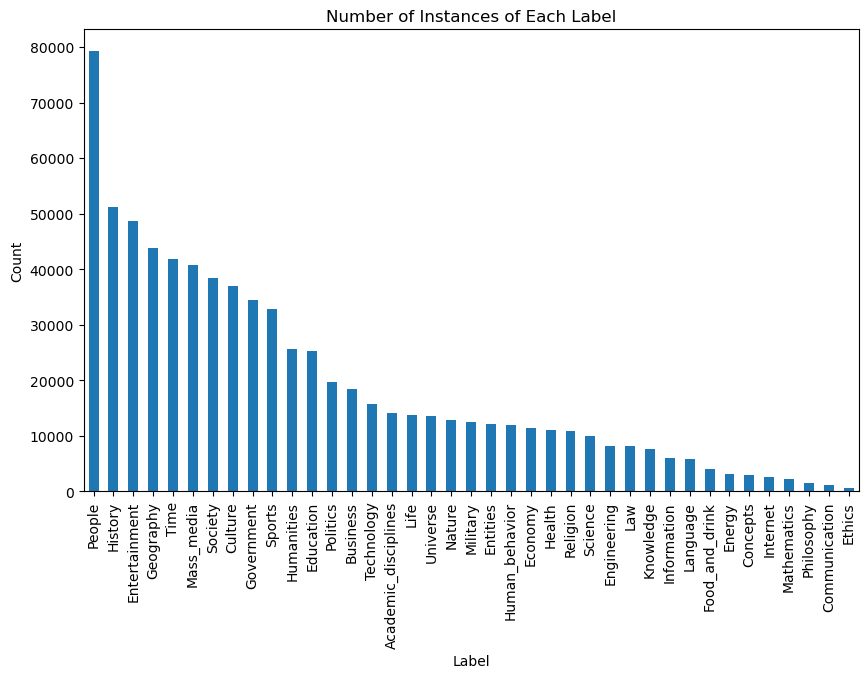

In [27]:
import pandas as pd
import json

text_Data_df = pd.read_parquet('GenericMixOfTopic.parquet')

# Convert the binary dictionary to a dictionary format
text_Data_df['topics_with_percentages'] = text_Data_df['topics_with_percentages'].apply(lambda x: json.loads(x.decode('utf-8')))

# Create a new DataFrame containing only the labels
labels_df = pd.DataFrame(text_Data_df['topics_with_percentages'].tolist())

labels_df = labels_df.applymap(lambda x: 1 if x > 0 else 0)

sums = labels_df.sum(axis=0).sort_values(ascending=False)

# bar chart for the number of instances of each label
plt.figure(figsize=(10, 6))
sums.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Instances of Each Label')
plt.show()

# remove and release variable text_Data_df
del text_Data_df

# labels_df.head()

For getting more insight regarding the labeling, we take a look at labels that have the most probablility

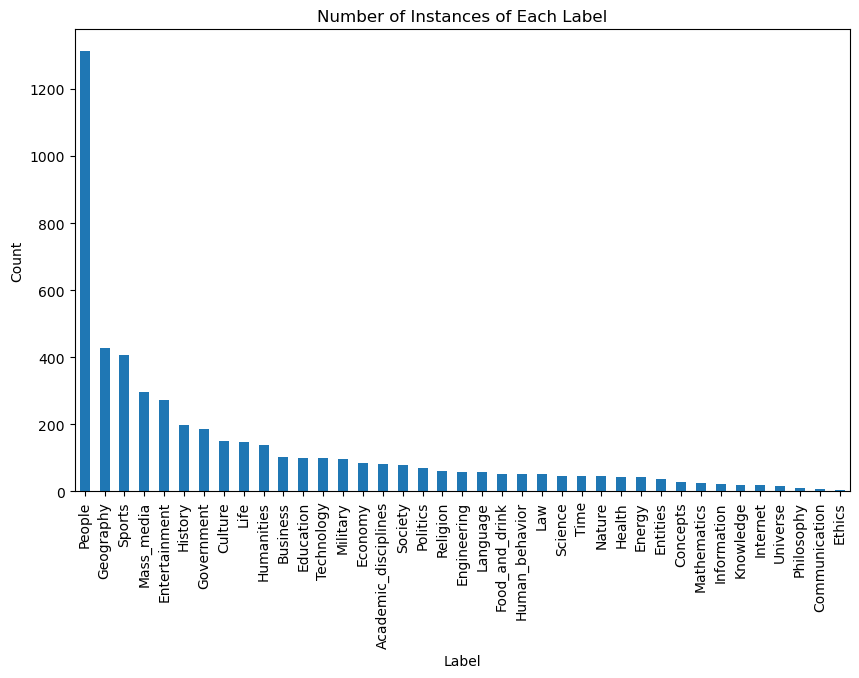

In [2]:
sample_data = pd.read_parquet('sampled_data.parquet')

sample_data['topics_with_percentages'] = sample_data['topics_with_percentages'].apply(lambda x: json.loads(x.decode('utf-8')))

# for each row, extract the label with the highest percentage
sample_data['label'] = sample_data['topics_with_percentages'].apply(lambda x: max(x, key=x.get))

label_dist = sample_data['label'].value_counts()

label_dist.sort_values(ascending=False, inplace=True)

# bar chart for the number of instances of each label
plt.figure(figsize=(10, 6))
label_dist.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Instances of Each Label')
plt.show()


In [ ]:
text_Data_df = pd.read_parquet('GenericMixOfTopic.parquet')

# Convert the binary dictionary to a dictionary format
text_Data_df['topics_with_percentages'] = text_Data_df['topics_with_percentages'].apply(lambda x: json.loads(x.decode('utf-8')))

In [56]:
# Create a new DataFrame containing only the labels
labels_df = pd.DataFrame(text_Data_df['topics_with_percentages'].tolist())

average_values = labels_df.mean(axis=1)

average_values

0         0.025897
1         0.025641
2         0.025641
3         0.025641
4         0.025641
            ...   
200000    0.025641
200001    0.025641
200002    0.025641
200003    0.025897
200004    0.025641
Length: 200005, dtype: float64

In [65]:
for column in labels_df.columns:
    labels_df[column] = labels_df[column] > average_values

labels_df = labels_df.applymap(lambda x: 1 if x else 0)

sums = labels_df.sum(axis=1)

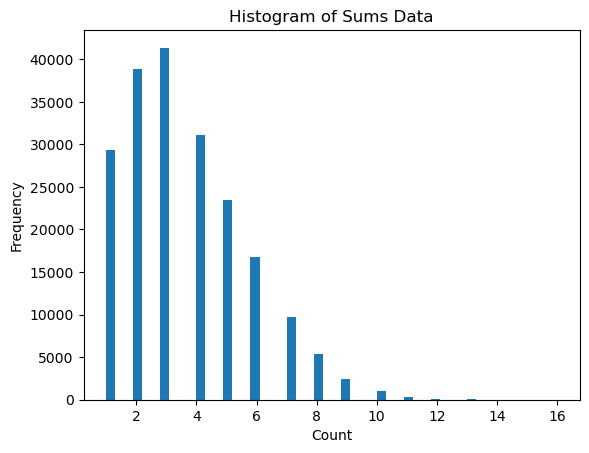

In [66]:
import matplotlib.pyplot as plt

# Create a histogram plot
plt.hist(sums, bins=50)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Sums Data')
plt.show()

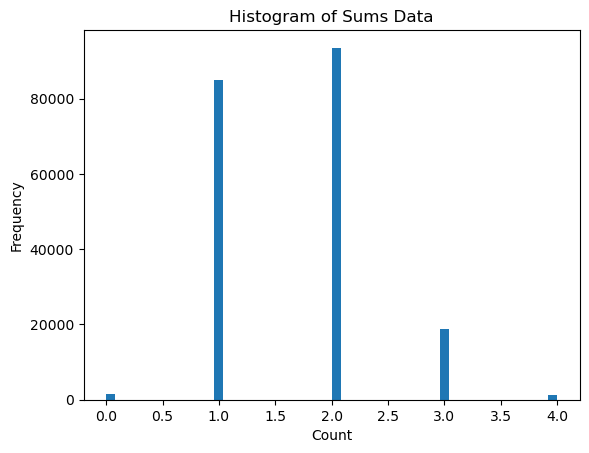

In [53]:
import matplotlib.pyplot as plt

# Create a histogram plot
plt.hist(sums, bins=50)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Sums Data')
plt.show()

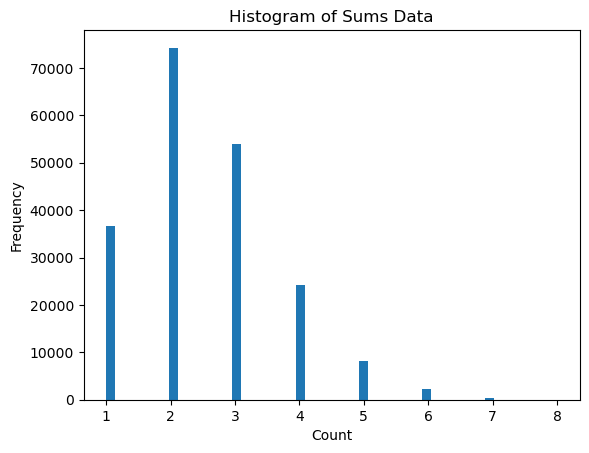

In [51]:
import matplotlib.pyplot as plt

# Create a histogram plot
plt.hist(sums, bins=50)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Sums Data')
plt.show()

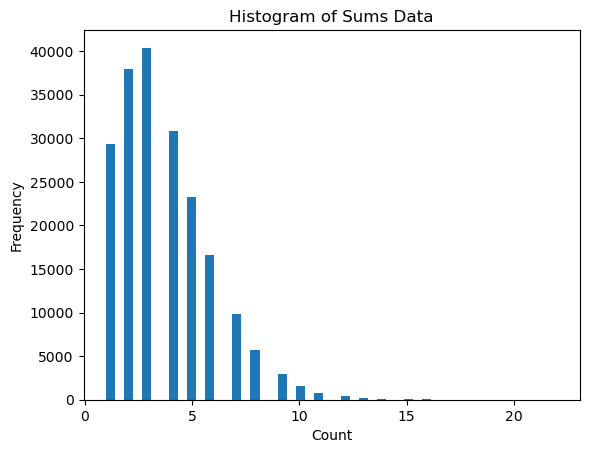

In [49]:
import matplotlib.pyplot as plt

# Create a histogram plot
plt.hist(sums, bins=50)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Sums Data')
plt.show()

In [26]:
labels_df.sum(axis=0).sort_values(ascending=False)

People                  79193
History                 51268
Entertainment           48759
Geography               43773
Time                    41784
Mass_media              40706
Society                 38497
Culture                 36941
Government              34496
Sports                  32916
Humanities              25697
Education               25256
Politics                19628
Business                18514
Technology              15728
Academic_disciplines    14075
Life                    13700
Universe                13523
Nature                  12876
Military                12478
Entities                12195
Human_behavior          12027
Economy                 11470
Health                  11098
Religion                10861
Science                  9898
Engineering              8236
Law                      8135
Knowledge                7594
Information              6075
Language                 5897
Food_and_drink           3963
Energy                   3080
Concepts  

### The distribution of probablites for different labels among the data.

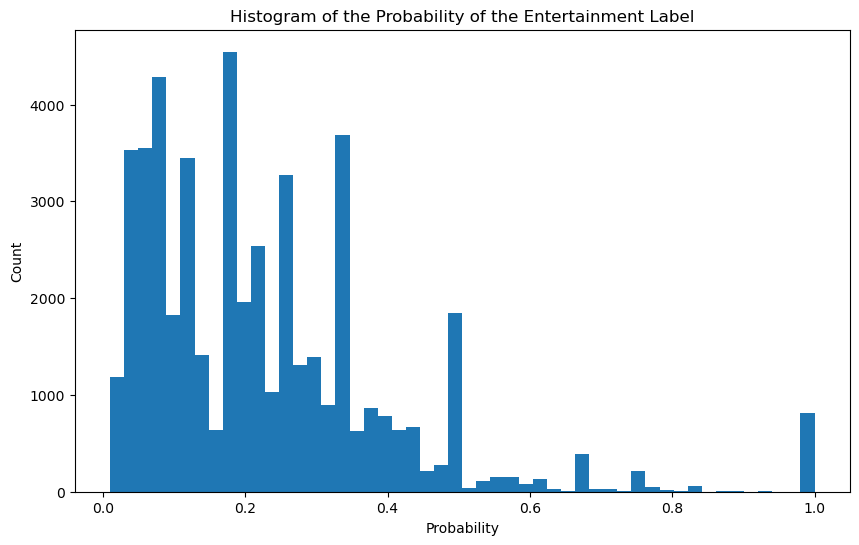

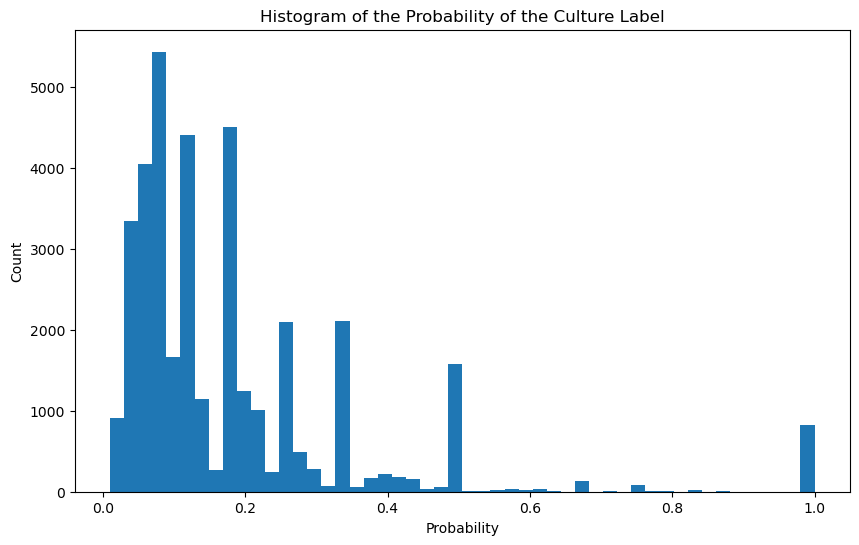

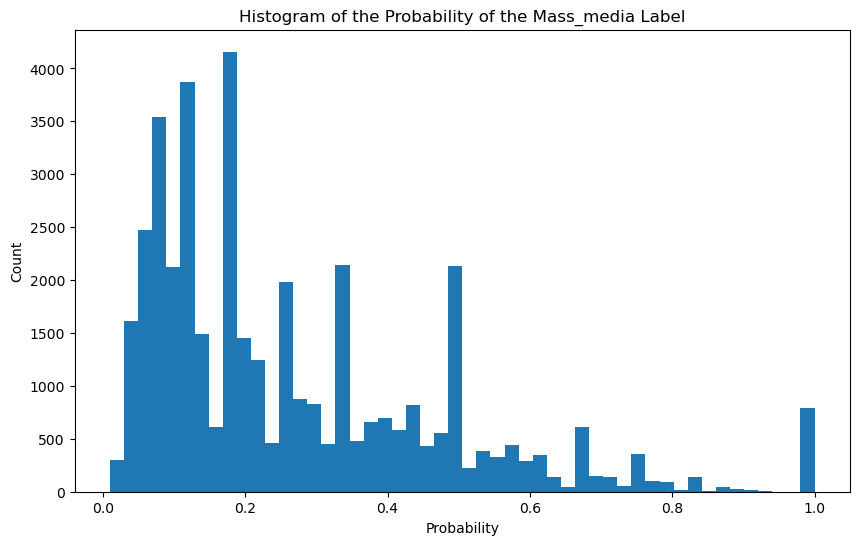

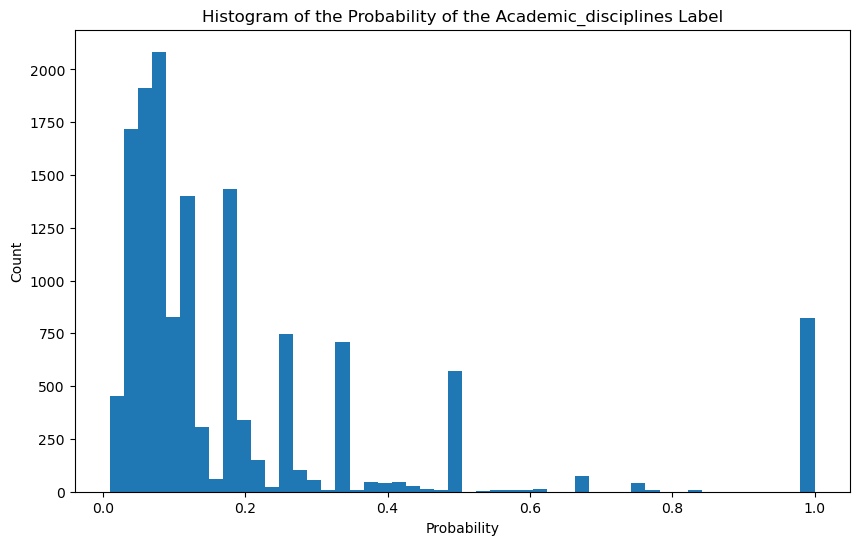

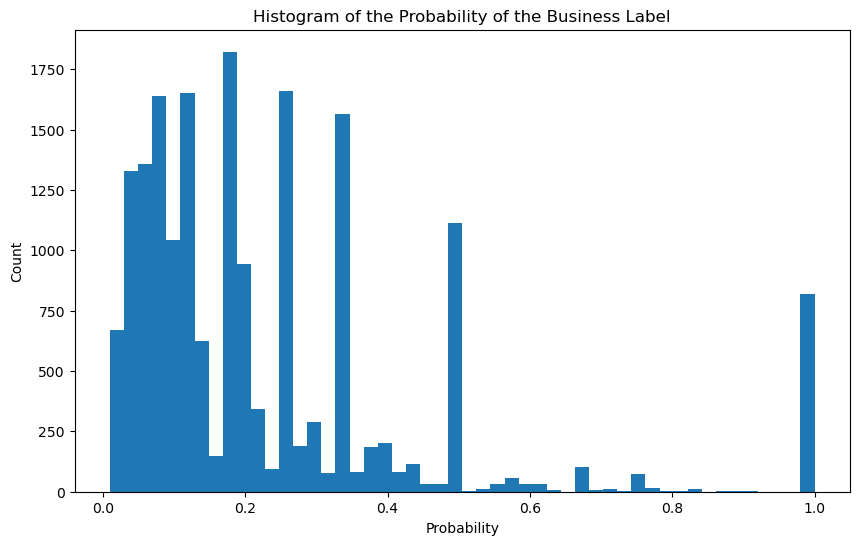

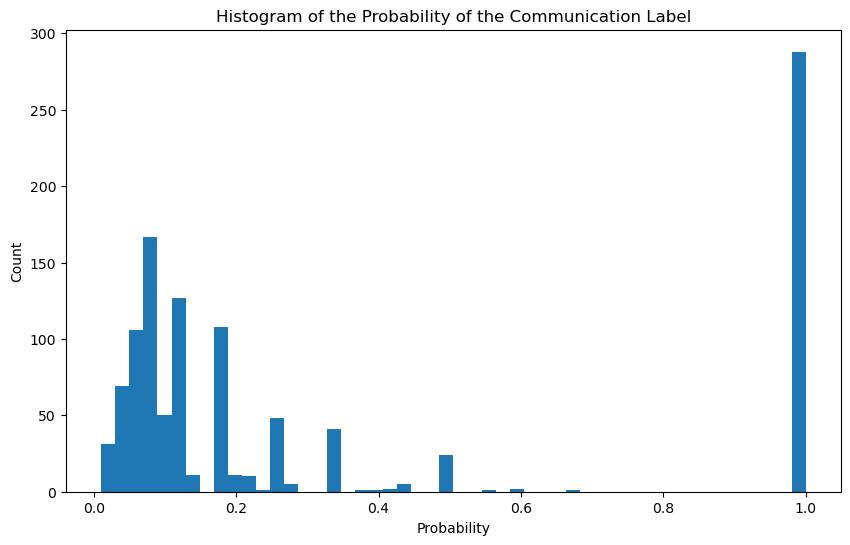

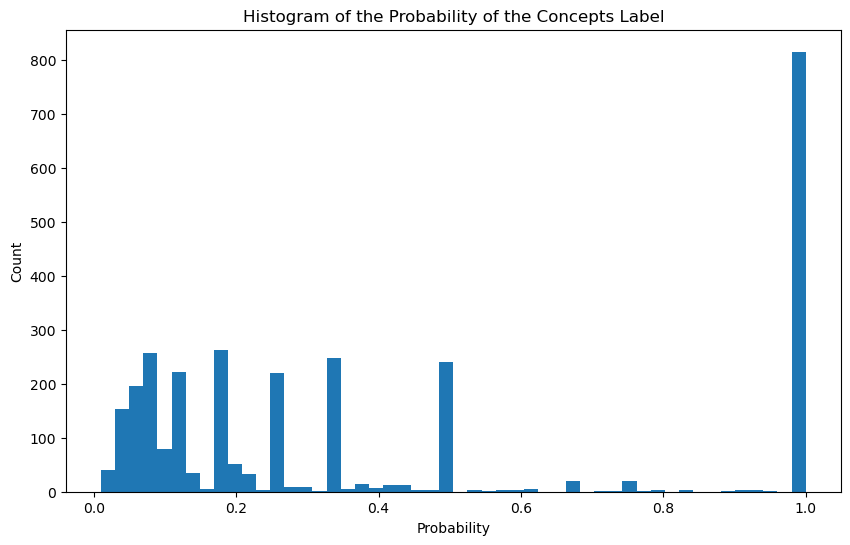

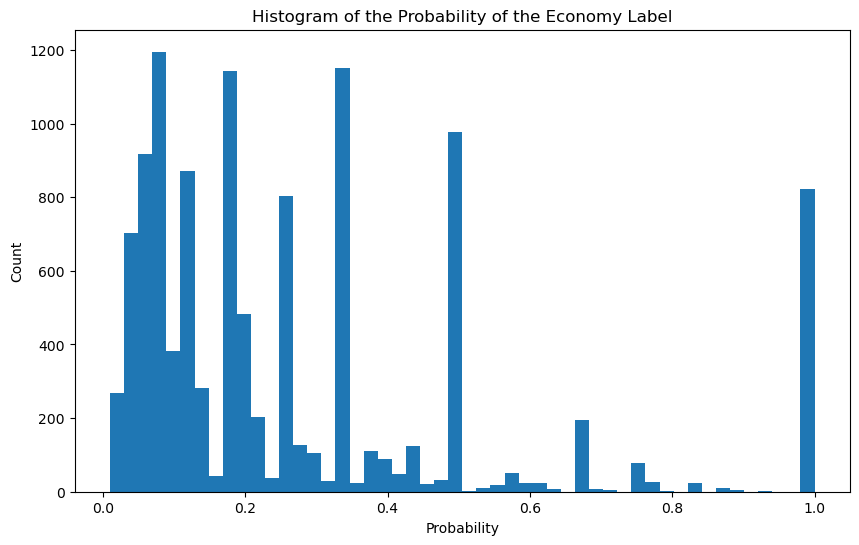

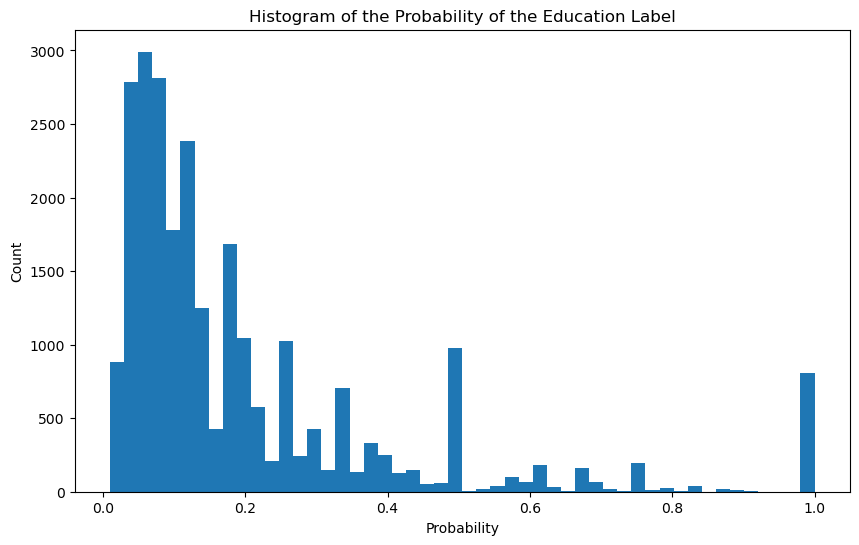

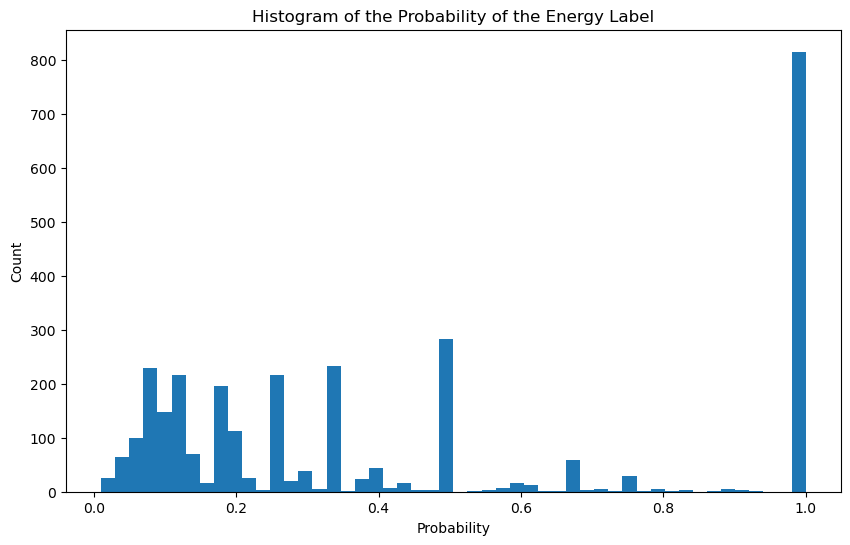

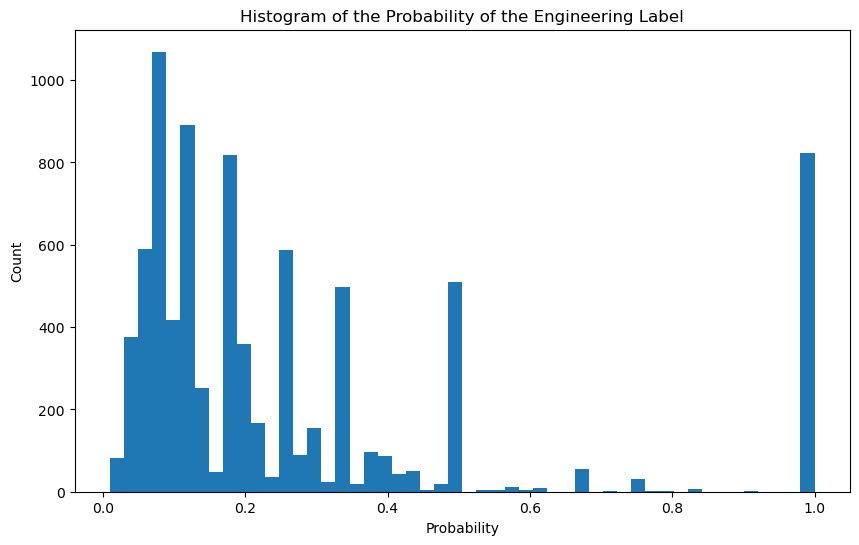

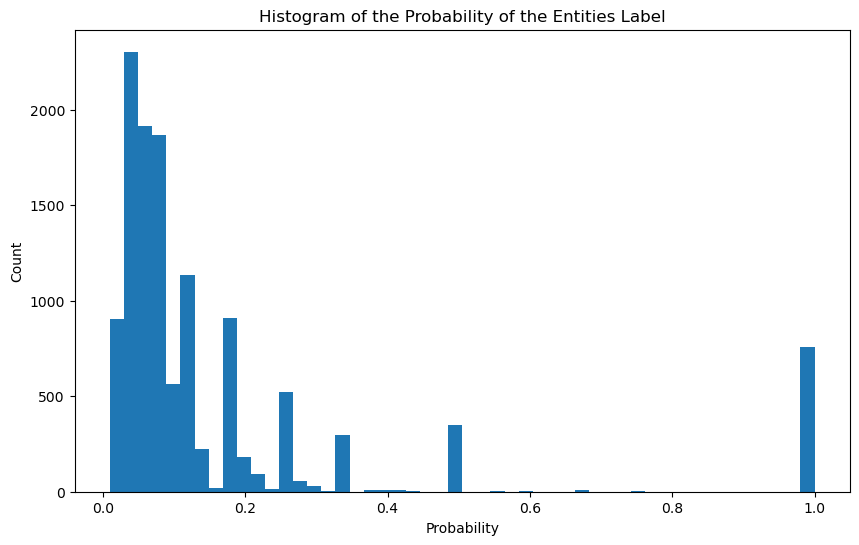

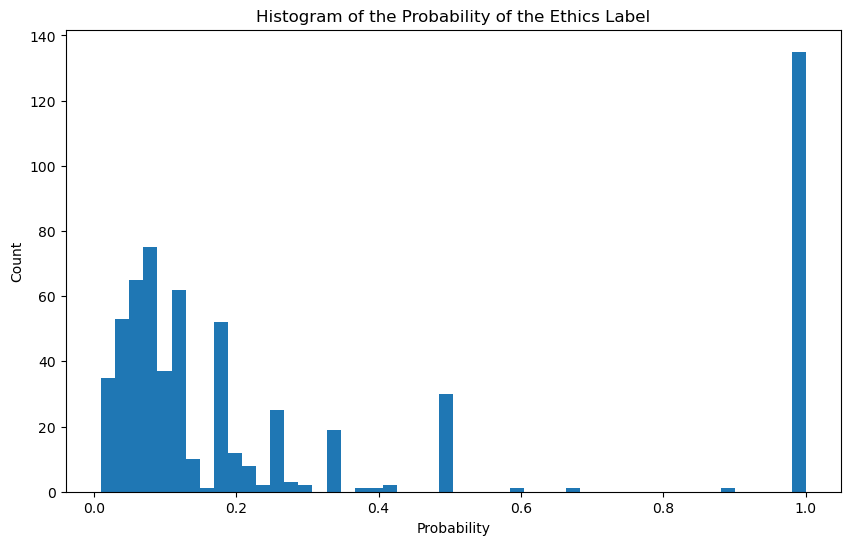

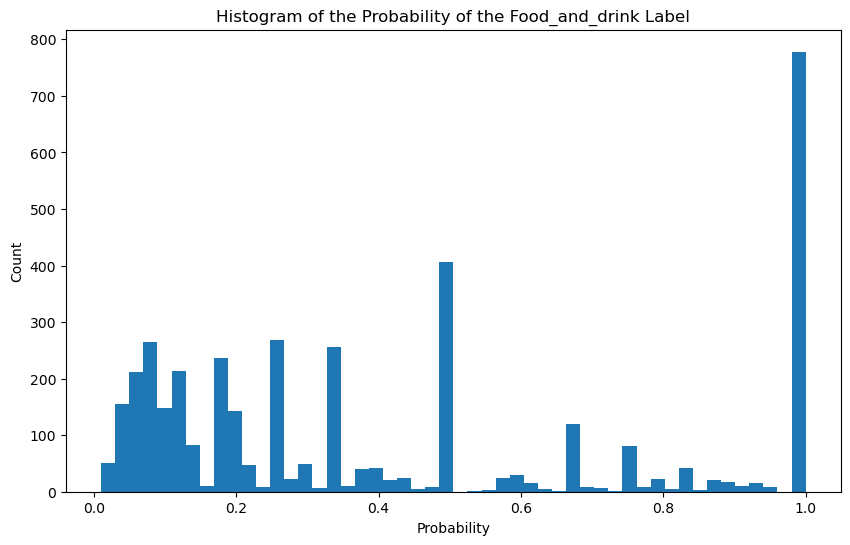

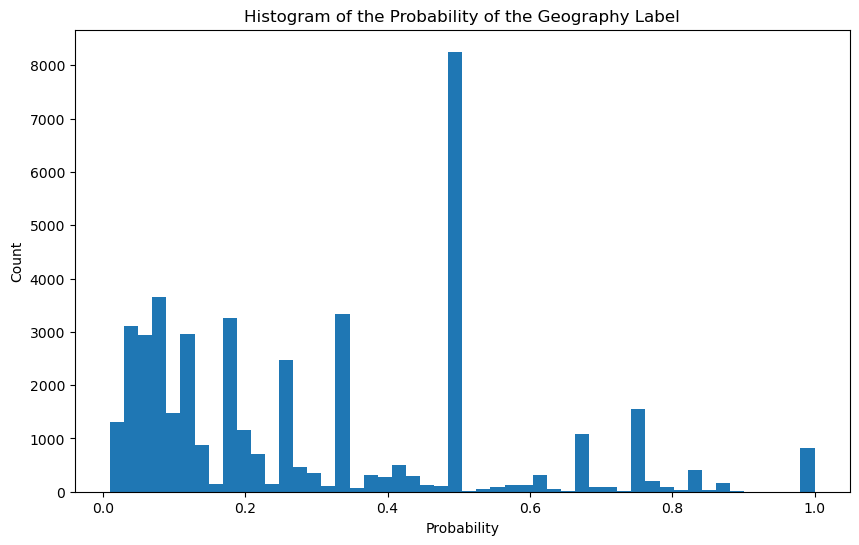

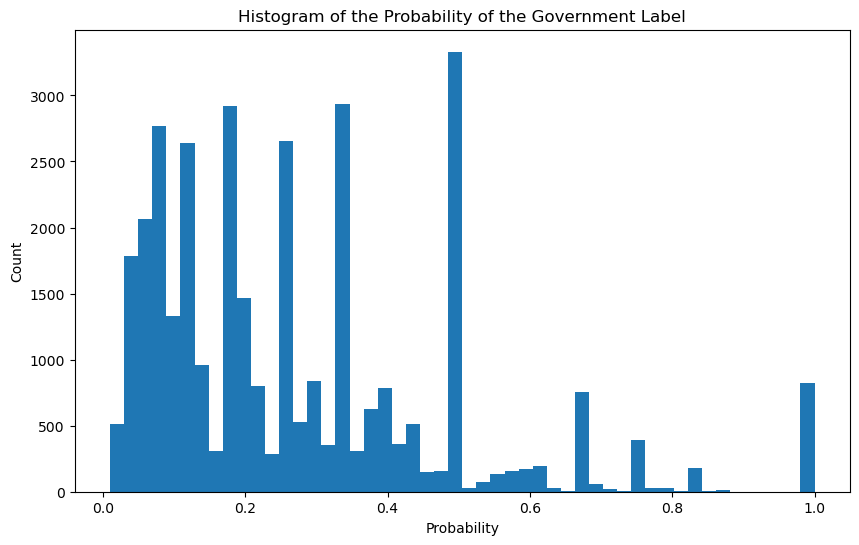

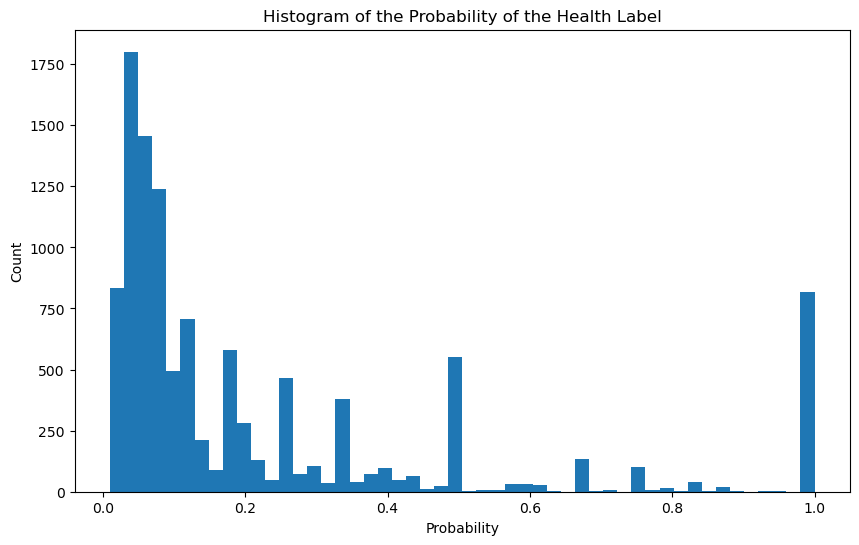

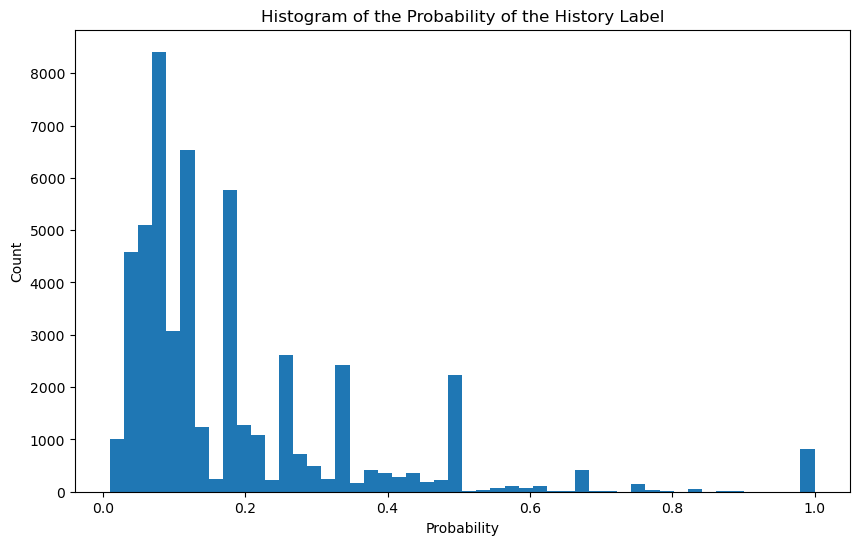

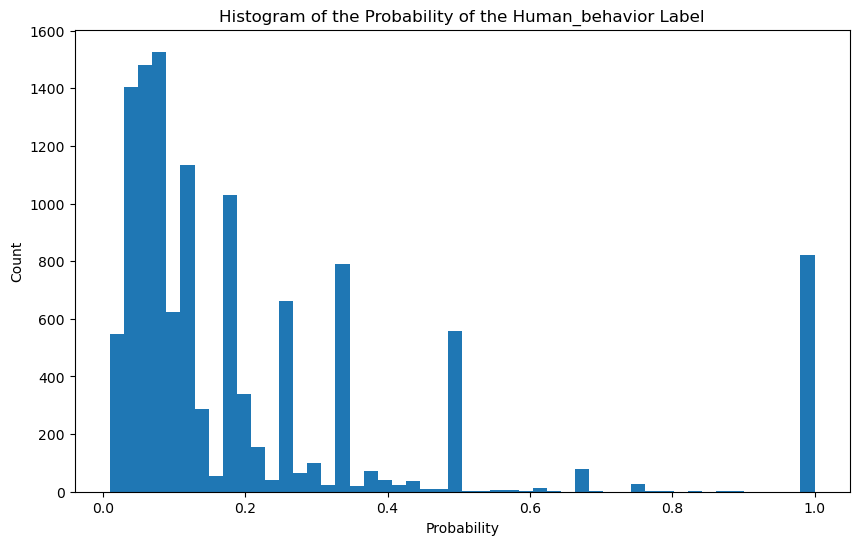

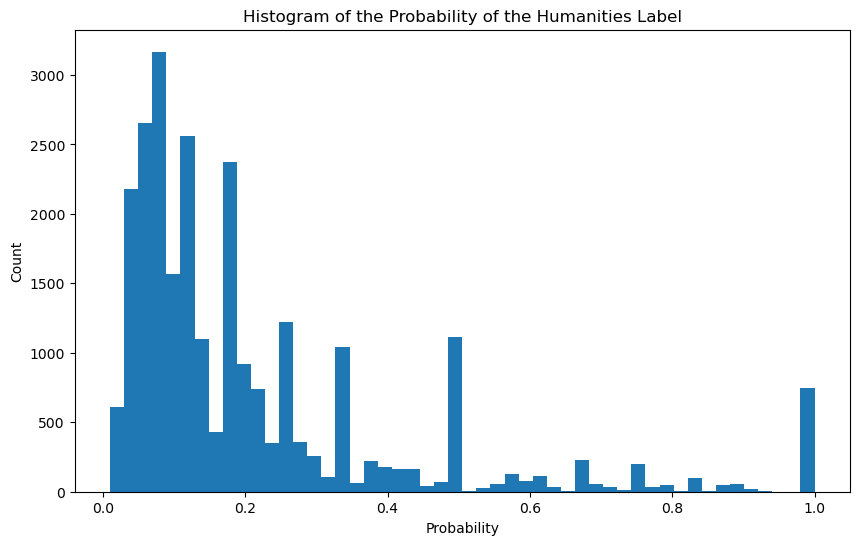

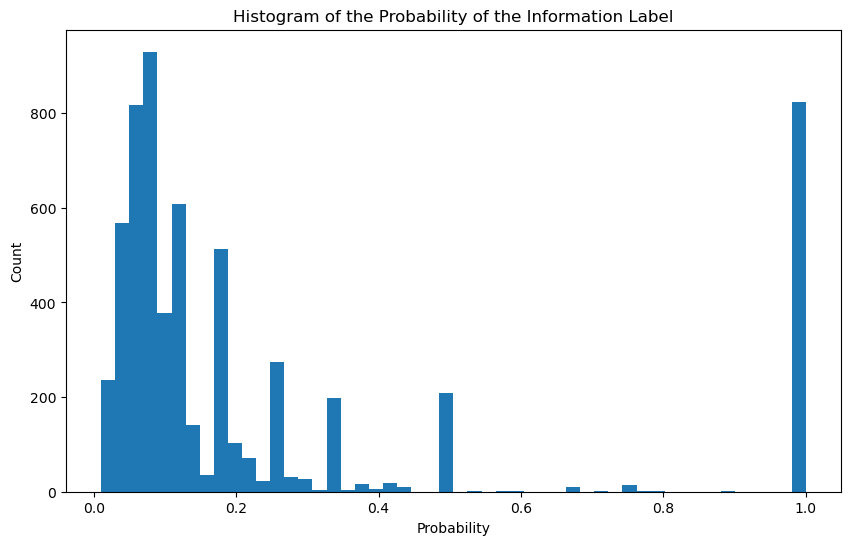

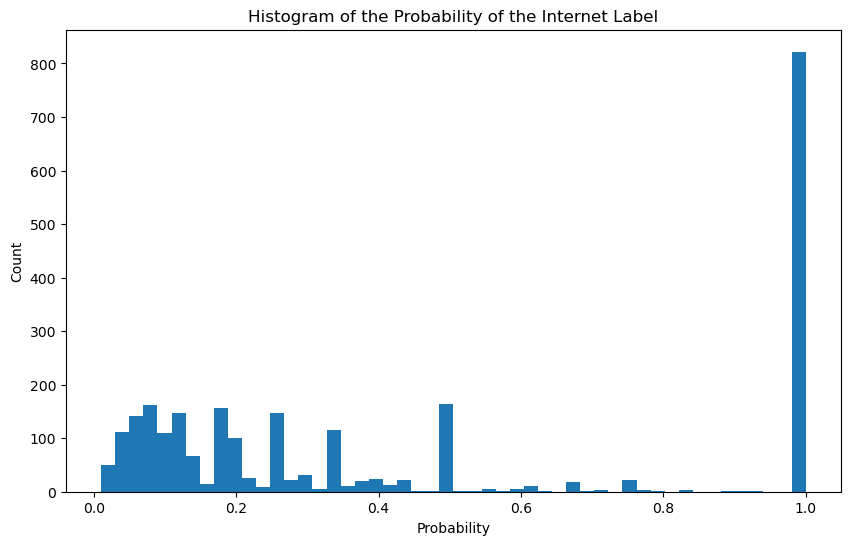

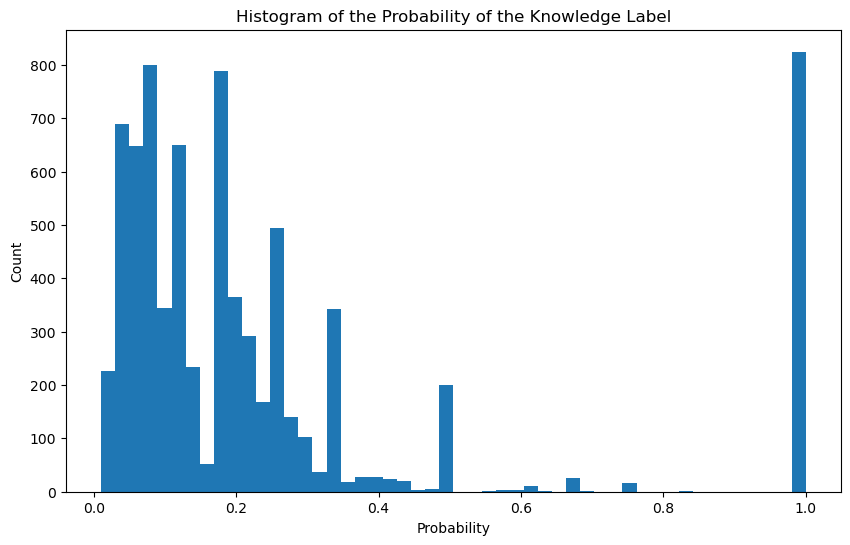

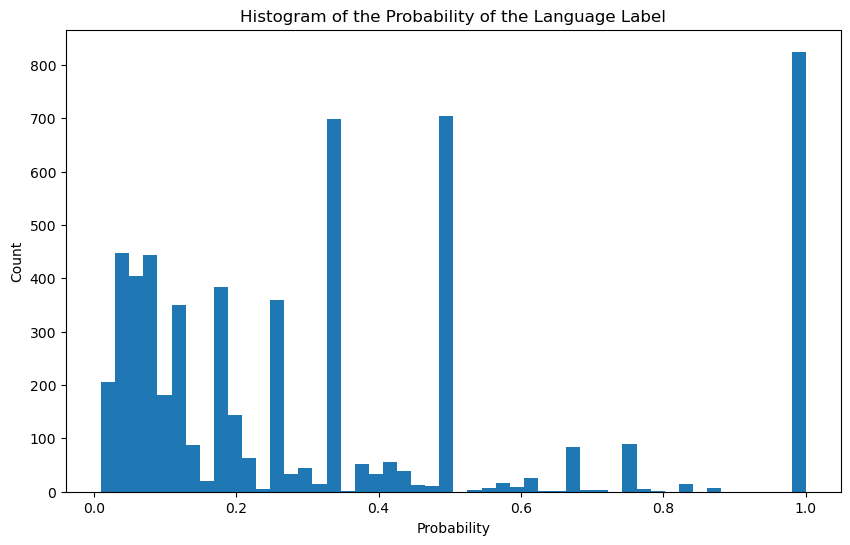

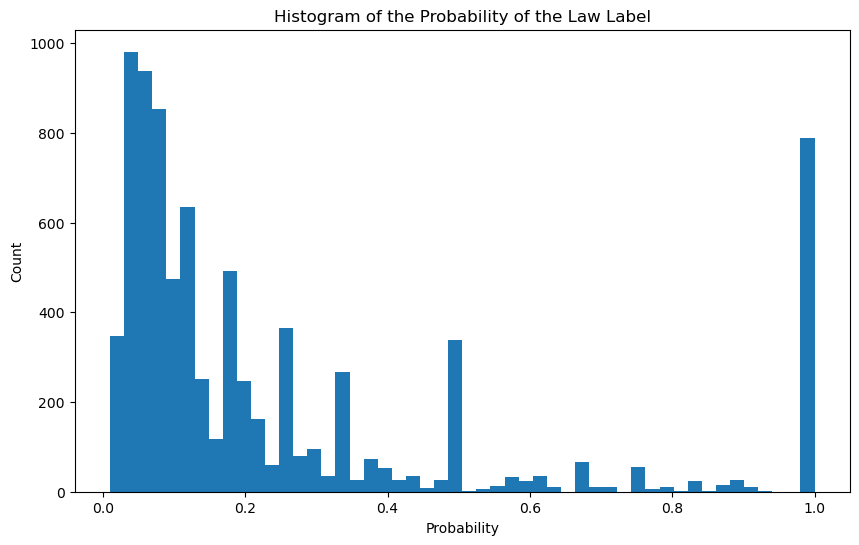

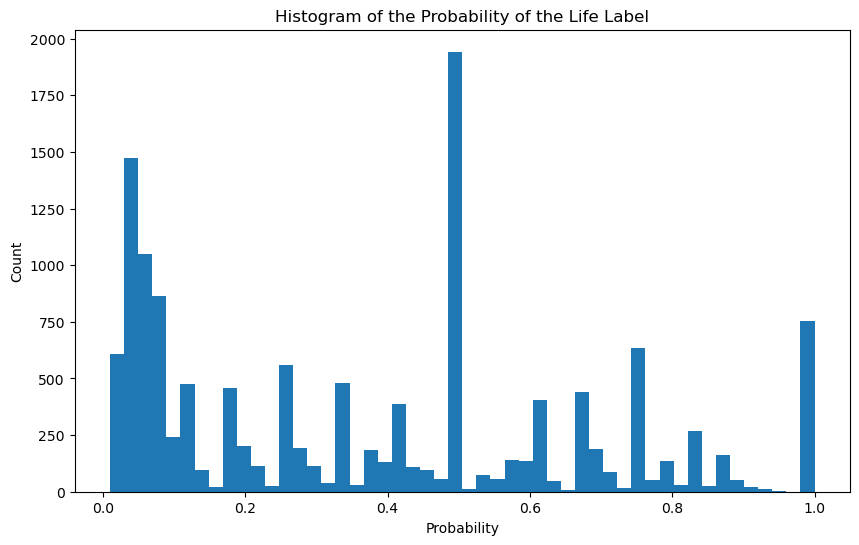

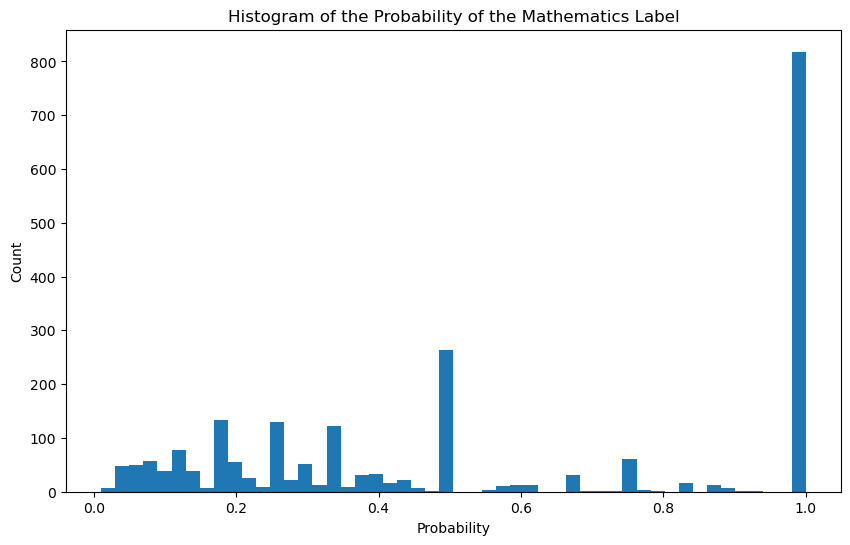

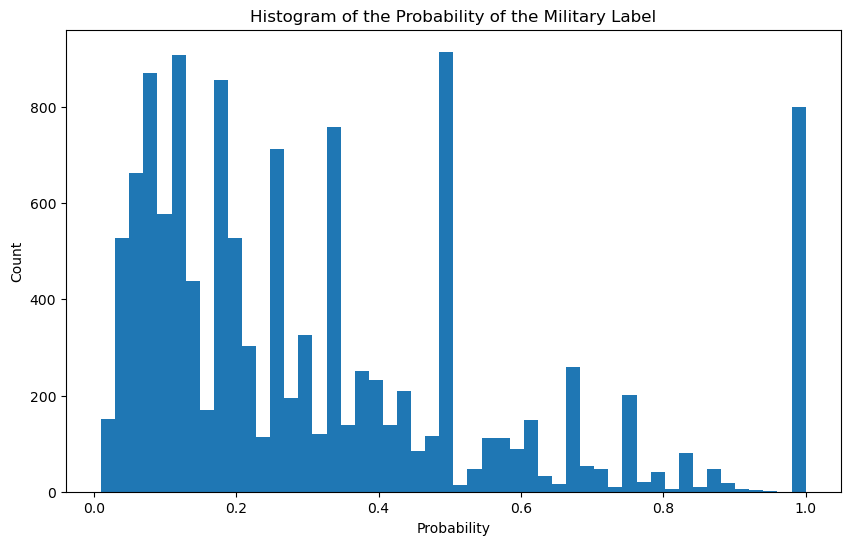

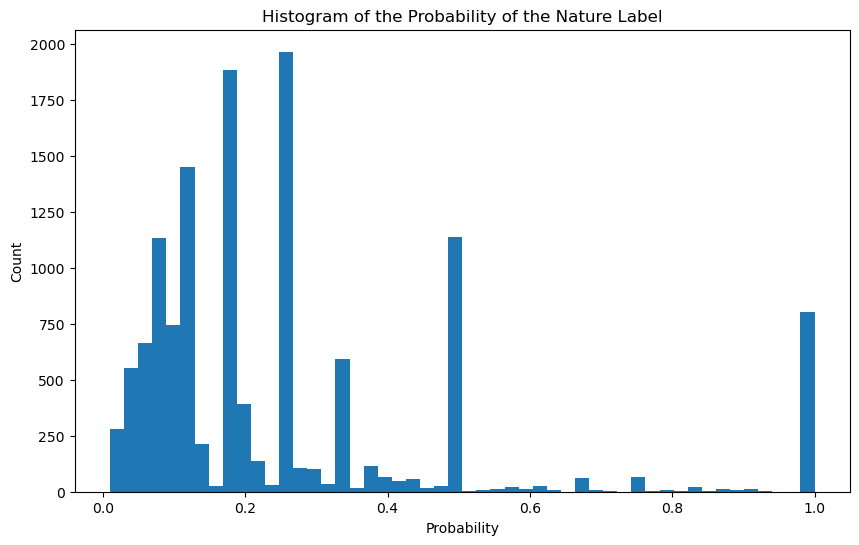

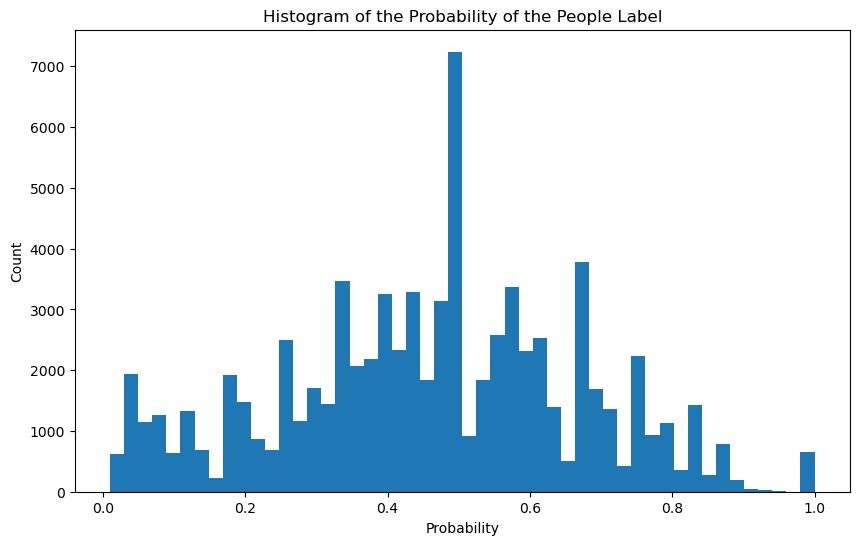

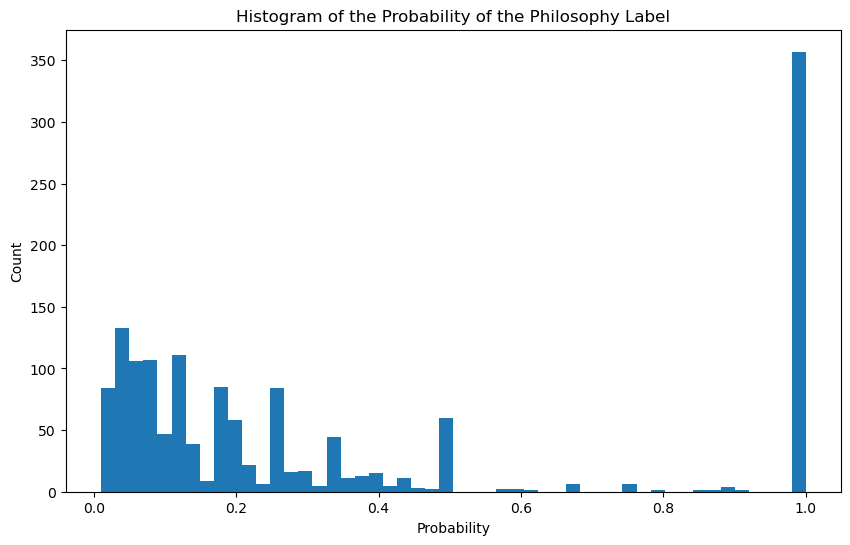

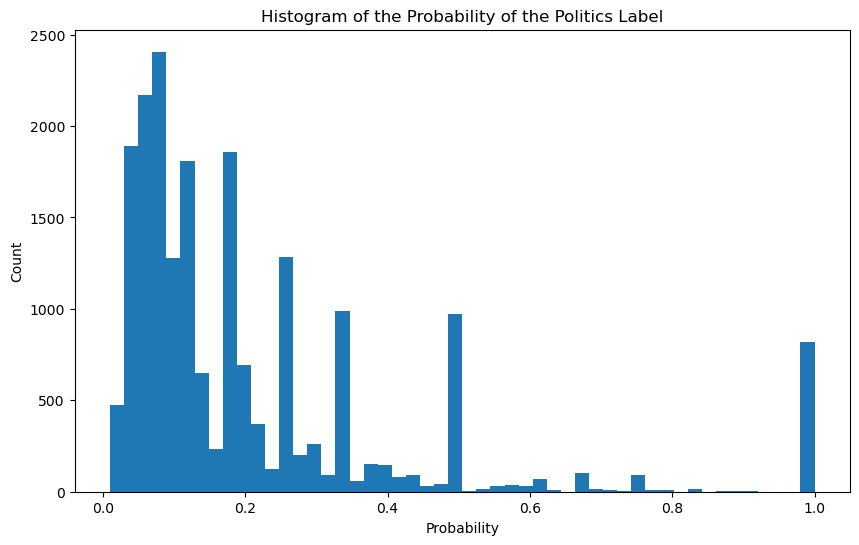

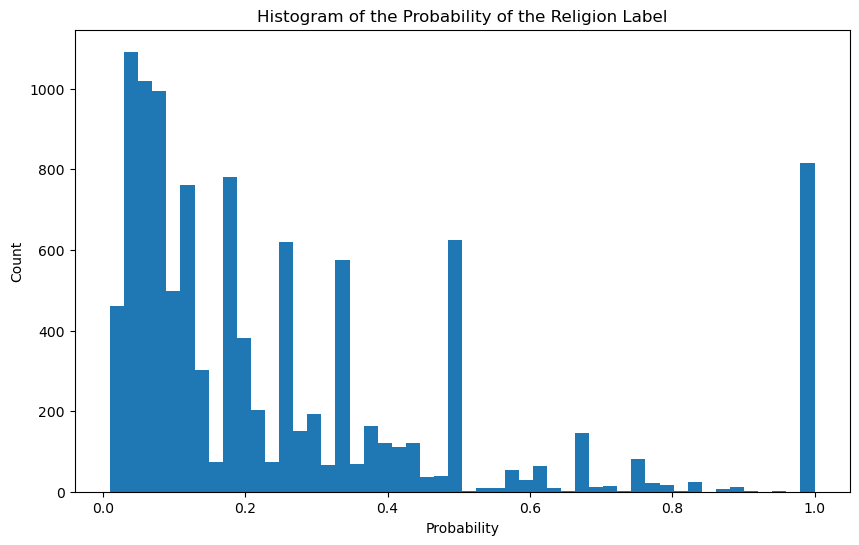

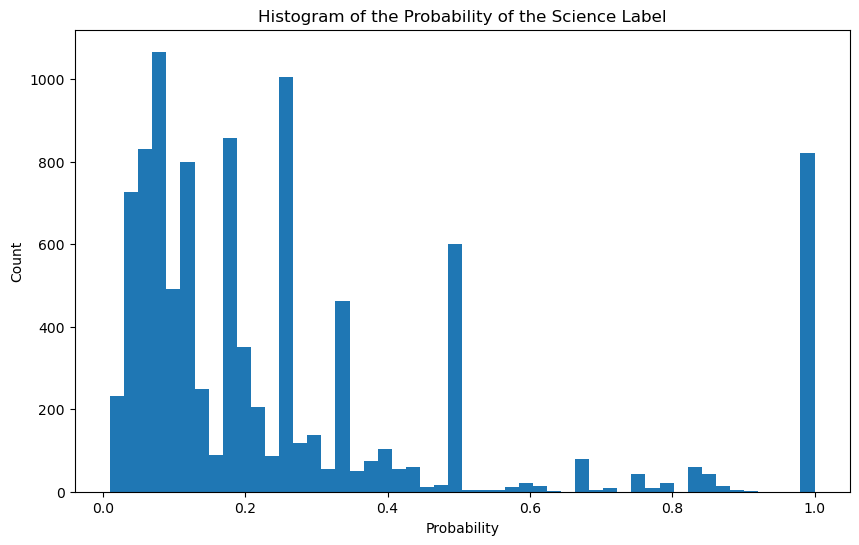

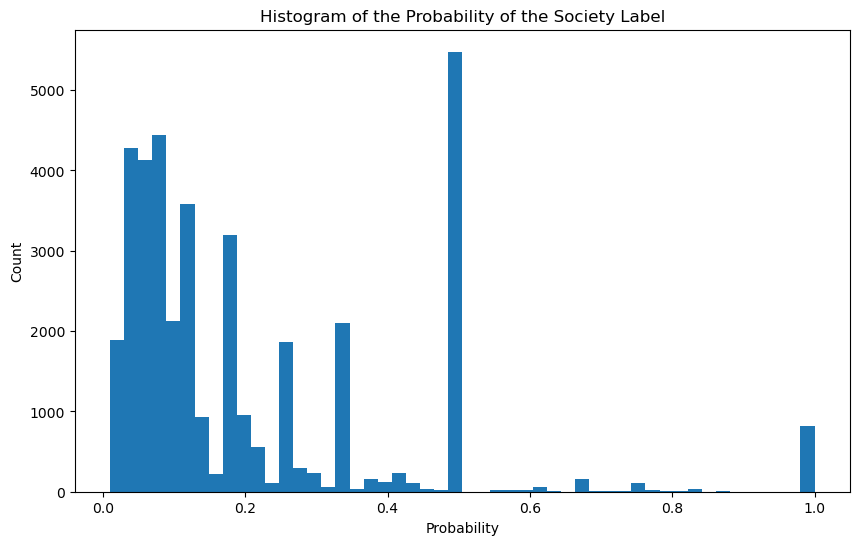

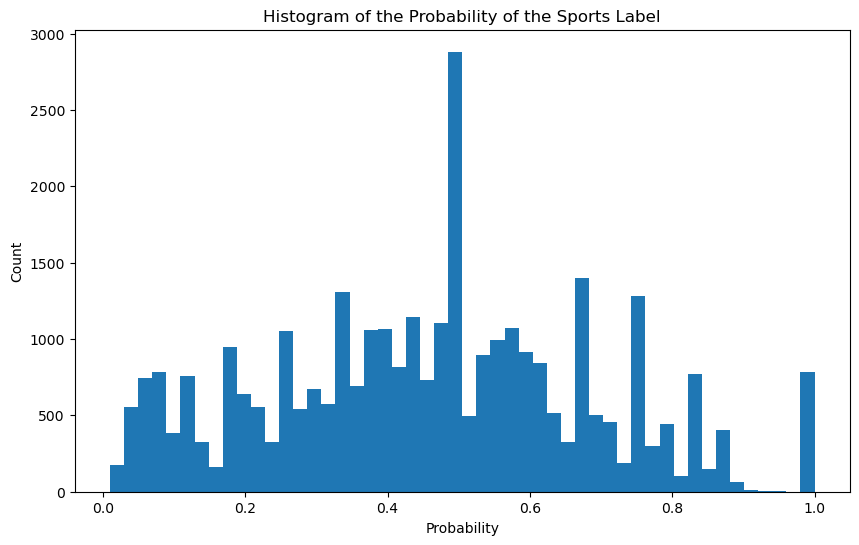

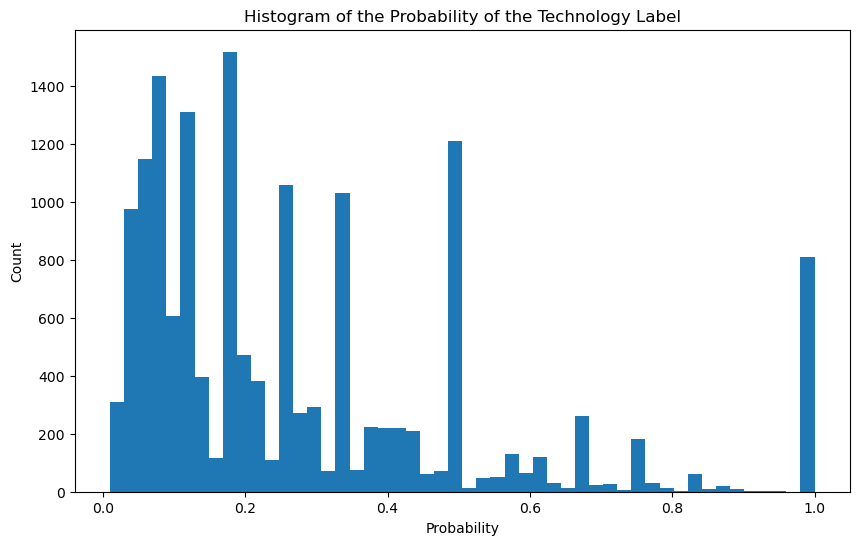

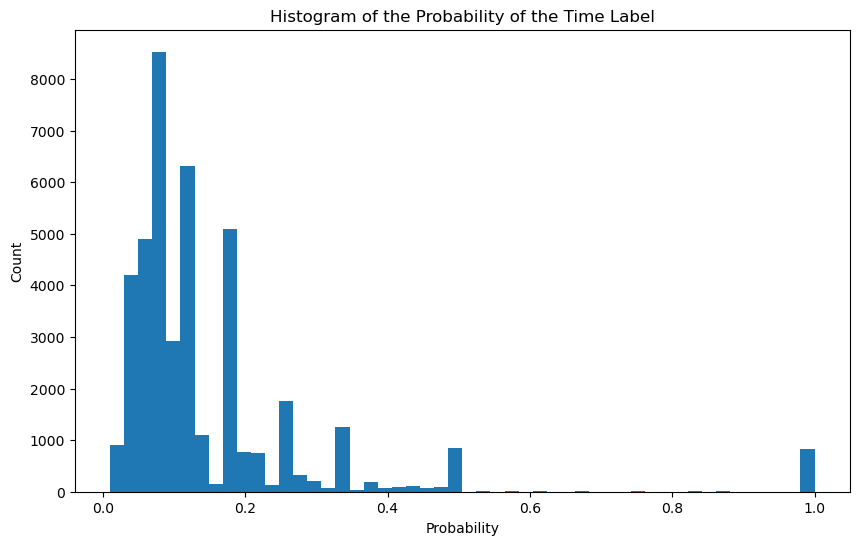

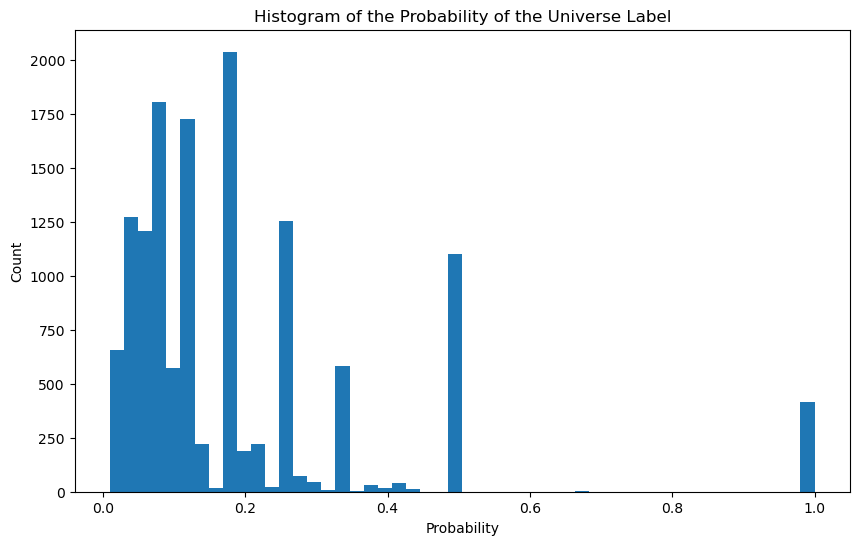

In [38]:
text_Data_df = pd.read_parquet('GenericMixOfTopic.parquet')

text_Data_df['topics_with_percentages'] = text_Data_df['topics_with_percentages'].apply(lambda x: json.loads(x.decode('utf-8')))

labels_df = pd.DataFrame(text_Data_df['topics_with_percentages'].tolist())

labels = text_Data_df.iloc[0]['topics_with_percentages'].keys()

for i in labels:
    probs = labels_df[labels_df[i] > 0][i]

    # Plot a histogram of the probabilities
    plt.figure(figsize=(10, 6))
    plt.hist(probs, bins=50)
    plt.xlabel('Probability')
    plt.ylabel('Count')
    plt.title(f'Histogram of the Probability of the {str(i)} Label')
    plt.show()

del text_Data_df

In [19]:
for key in :
    print(key)

Education
Society
Academic_disciplines
Business
Communication
Concepts
Culture
Economy
Energy
Engineering
Entertainment
Entities
Ethics
Food_and_drink
Geography
Government
Health
History
Human_behavior
Humanities
Information
Internet
Knowledge
Language
Law
Life
Mass_media
Mathematics
Military
Nature
People
Philosophy
Politics
Religion
Science
Sports
Technology
Time
Universe


# Label Association

In [40]:
import pandas as pd
import json

text_Data_df = df.copy()

# Convert the binary dictionary to a dictionary format
text_Data_df['topics_with_percentages'] = text_Data_df['topics_with_percentages'].apply(lambda x: json.loads(x.decode('utf-8')))

# Create a new DataFrame containing only the labels
labels_df = pd.DataFrame(text_Data_df['topics_with_percentages'].tolist())

# Calculate the correlation matrix
correlation_matrix = labels_df.corr()

# Filter the correlation matrix to consider labels with a correlation value higher than 0.1
correlated_labels = correlation_matrix[abs(correlation_matrix) > 0].stack().reset_index()
correlated_labels.columns = ['Label 1', 'Label 2', 'Correlation']

# Filter out the self-correlations (correlation of a label with itself)
correlated_labels = correlated_labels[correlated_labels['Label 1'] != correlated_labels['Label 2']]

# Filter out duplicates (correlations are symmetric)
correlated_labels['sorted_labels'] = correlated_labels.apply(lambda x: tuple(sorted([x['Label 1'], x['Label 2']])), axis=1)
correlated_labels = correlated_labels.drop_duplicates('sorted_labels')

# claculate R^2 for each pair of labels
correlated_labels['R^2'] = round(correlated_labels['Correlation'] ** 2, 3)

# Sort the correlations by their absolute value
correlated_labels = correlated_labels.sort_values(by='R^2', ascending=False)

# Display the correlated labels
print(correlated_labels[['Correlation', 'R^2', 'sorted_labels']])

      Correlation    R^2                       sorted_labels
700      0.302406  0.091                     (History, Time)
2        0.274267  0.075         (Entertainment, Mass_media)
584      0.229322  0.053               (Geography, Universe)
575     -0.231128  0.053                 (Geography, People)
1003     0.229297  0.053                      (Life, Nature)
...           ...    ...                                 ...
136      0.003357  0.000  (Academic_disciplines, Humanities)
423     -0.003414  0.000              (Engineering, Science)
422     -0.017945  0.000             (Engineering, Religion)
420     -0.008413  0.000           (Engineering, Philosophy)
564     -0.020039  0.000         (Geography, Human_behavior)

[741 rows x 3 columns]


In [16]:
import pandas as pd
import json

text_Data_df = df.copy()

# Convert the binary dictionary to a dictionary format
text_Data_df['topics_with_percentages'] = text_Data_df['topics_with_percentages'].apply(lambda x: json.loads(x.decode('utf-8')))

# Create a new DataFrame containing only the labels
labels_df = pd.DataFrame(text_Data_df['topics_with_percentages'].tolist())

# if values are more than 0, then assign 1 to it
labels_df = labels_df.applymap(lambda x: 1 if x > 0 else 0)

# calculate phi coefficient
phi_coefficient = labels_df.corr(method='spearman')

# flatten the matrix
phi_coefficient = phi_coefficient.stack().reset_index()

# set column names
phi_coefficient.columns = ['Label 1', 'Label 2', 'spearman Coefficient']

# filter out the self-correlations
phi_coefficient = phi_coefficient[phi_coefficient['Label 1'] != phi_coefficient['Label 2']].sort_values(by='spearman Coefficient', ascending=False)

# remove duplicates
phi_coefficient['sorted_labels'] = phi_coefficient.apply(lambda x: tuple(sorted([x['Label 1'], x['Label 2']])), axis=1)
phi_coefficient = phi_coefficient.drop_duplicates('sorted_labels')

# drop the sorted_labels column
phi_coefficient = phi_coefficient.drop('sorted_labels', axis=1)

phi_coefficient.head(20)

,Label 1,Label 2,spearman Coefficient
700,History,Time,0.764094
78,Mass_media,Entertainment,0.495568
1117,Nature,Life,0.416723
584,Geography,Universe,0.392772
1224,Politics,Government,0.374996
743,Humanities,Mass_media,0.343539
649,Health,Life,0.327931
1139,People,Education,0.285005
79,Mass_media,Culture,0.274433
1394,Sports,People,0.272099


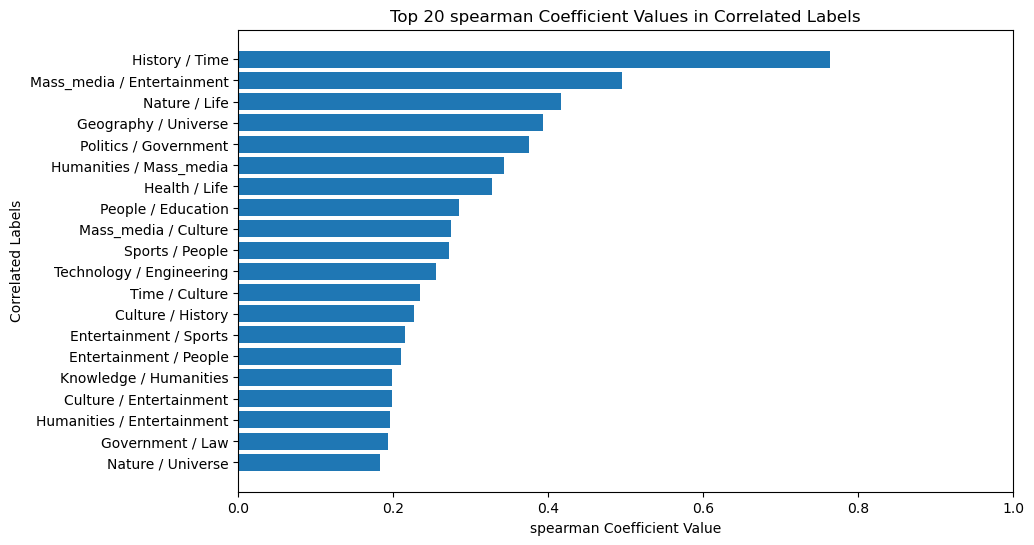

In [17]:
import matplotlib.pyplot as plt

# Convert the tuples to strings
top_20_labels = phi_coefficient.head(20)

#reverse the order of the rows
top_20_labels = top_20_labels.iloc[::-1]

# Create a bar plot of the R^2 values
plt.figure(figsize=(10, 6))
plt.barh(top_20_labels['Label 1'] + ' / ' + top_20_labels['Label 2'], top_20_labels['spearman Coefficient'])
plt.xlabel('spearman Coefficient Value')
plt.ylabel('Correlated Labels')
plt.xlim(0, 1)
plt.title('Top 20 spearman Coefficient Values in Correlated Labels')
plt.show()

Except some pairs, others have a low correlation value.

In [8]:
import random

# Copy the df dataframe into a new variable
df_copy = df.copy()

# Sample 100 random rows
sample_df = df_copy.sample(n=100, random_state=42)

# Print the first sentence of the text column
for row in range(len(sample_df)):
    first_sentence = sample_df.iloc[row]['text'].split('.')[0]
    # Print the row index and the first sentence of the text
    print(sample_df.iloc[row]['title'] + " : ")
    print(first_sentence)
    print()


Orchard Park High School, Croydon : 
  Orchard Park High School (formerly Edenham High School) is an 11–18 Mixed-sex education|mixed , secondary school and sixth form with Academy (English school)|academy status in Shirley, London|Shirley , Croydon , Greater London , England

Kąty, Gorlice County : 
  Kąty is a village in the administrative district of Gmina Biecz , within Gorlice County , Lesser Poland Voivodeship , in southern Poland

List of airports in Turkey : 
  This is a list of airport s in Turkey , sorted by location

Pete Bostwick : 
  George Herbert &quot;Pete&quot; Bostwick (August 14, 1909 – January 13, 1982) was an American real tennis|court tennis player, a steeplechase (horse racing)|steeplechase jockey and horse trainer , and an eight-goal polo player

Sione's Wedding (soundtrack) : 
  'Sione's Wedding' is the soundtrack to the New Zealand film, Sione's Wedding 

Branthwaite railway station : 
  Branthwaite railway station was built by the Whitehaven, Cleator and Egrem

# Tokenization

In [5]:
import json

data = df.copy()
data['topics_with_percentages'] = data['topics_with_percentages'].apply(lambda x: json.loads(x.decode('utf-8')))

all_topics = set()
for topics in data['topics_with_percentages']:
    all_topics.update(topics.keys())
all_topics = sorted(all_topics)  

def topics_to_vector(topics_dict):
    return [topics_dict.get(topic, 0) for topic in all_topics]
y = pd.DataFrame(data['topics_with_percentages'].apply(topics_to_vector).tolist(), columns=all_topics)

In [6]:
y.head()

,Academic_disciplines,Business,Communication,Concepts,Culture,Economy,Education,Energy,Engineering,Entertainment,...,People,Philosophy,Politics,Religion,Science,Society,Sports,Technology,Time,Universe
0,0.0,0.00,0.0,0.0,0.0,0.00,0.75,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.25,0.00,0.0,0.00,0.0
1,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.50,0.00,0.0,0.00,0.0
2,0.0,0.00,0.0,0.0,0.0,0.25,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.25,0.00,0.0,0.00,0.0
3,0.0,0.08,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.06,...,0.6,0.0,0.0,0.0,0.0,0.00,0.26,0.0,0.00,0.0
4,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.17,0.0


In [7]:
data['combined_text'] = data['title'] + " " + data['text']
tfidf = TfidfVectorizer(max_features=10000, stop_words='english')
X = tfidf.fit_transform(data['combined_text'])

## Find top vocab with their tf-idf score, compare to label

In [18]:
df[df['topic'] != 'Mixed'].head()

,id,title,topic,topics_with_percentages,text
6,55646581,Sensemaking (information science),Information,"b'{""Information"":1.0,""Academic_disciplines"":0,...",While sensemaking has been studied by other ...
7,56877042,Prandtl–Batchelor theorem,Engineering,"b'{""Engineering"":1.0,""Academic_disciplines"":0,...","In fluid dynamics , Prandtl–Batchelor theorem..."
23,2428325,Potentiostat,Engineering,"b'{""Engineering"":1.0,""Academic_disciplines"":0,...",A potentiostat is the electronic hardware re...
24,38164073,Frank 'n Stuff,Food_and_drink,"b'{""Food_and_drink"":1.0,""Academic_disciplines""...",Frank 'n Stuff was the brand name of a hot d...
33,17400606,The Game of Life (book),Human_behavior,"b'{""Human_behavior"":1.0,""Academic_disciplines""...","'The Game of Life and How to Play It', publi..."


In [57]:
texts_oneTopic = X[df['topic'] != 'Mixed'].toarray()
labels_oneTopic = df['topic'][df['topic'] != 'Mixed'].to_numpy()

row1 = texts_oneTopic[0]
texts_oneTopic

# sort values in each row of numpy array texts_oneTopic
sorted_tfidf_vectors_top20 = np.argsort(texts_oneTopic, axis=1)[:, :-21:-1]

# get the feature names from the tfidf vectorizer
feature_names = np.array(tfidf.get_feature_names_out())


for i in range(5):
    print(f"{i} - {labels_oneTopic[i]}:")
    print(feature_names[sorted_tfidf_vectors_top20[i]])
    print()


0 - Information:
['reference' 'russell' 'et' 'al' 'data' 'science' '1993' 'interaction'
 'information' 'card' 'frame' 'cognitive' 'klein' 'computer' 'processes'
 'human' 'developing' 'research' 'quot' '1996']

1 - Engineering:
['math' 'omega' 'mathbf' 'gt' 'lt' 'psi' 'cdot' 'frac' 'theorem' 'closed'
 'reynolds' 'zero' 'equation' 'dimensional' 'circulation' 'flows'
 'equations' 'rightarrow' 'infty' 'number']

2 - Engineering:
['math' 'textrm' 'electrode' 'gt' 'lt' 'voltage' 'current' 'potential'
 'experiments' 'resistance' 'cell' 'control' 'frac' 'working' 'reference'
 'electric' 'beta' 'measured' 'rotating' 'range']

3 - Food_and_drink:
['chili' 'frank' 'dog' 'frankenstein' 'product' 'cheese' '1986' 'brand'
 'hot' 'dishes' 'recall' 'advertisements' 'filling' 'eponymous' 'monster'
 'company' 'fun' 'tunnel' 'variation' 'friendly']

4 - Human_behavior:
['law' 'quot' 'colony' 'florence' 'alma' 'gilbert' 'hampshire' 'explains'
 'word' 'christ' 'man' 'ye' 'game' 'life' 'bring' 'words' 'baker

## Single Labeled Probabilities

In [1]:
import pandas as pd
import json

main_dataset = pd.read_parquet('GenericMixOfTopic.parquet')
main_dataset['topics_with_percentages'] = main_dataset['topics_with_percentages'].apply(lambda x: json.loads(x.decode('utf-8')))

single_topics = main_dataset[main_dataset["topic"] != "Mixed"]

In [ ]:
temp = single_topics[['topic', 'topics_with_percentages']]
temp['topic-percentage'] = temp.apply(lambda x: x['topics_with_percentages'].get(x['topic']), axis=1)
res = temp[temp['topic-percentage'] < 1]
res.sort_values(by='topic-percentage', ascending=True).head(10)